Number of anomalies detected: 18


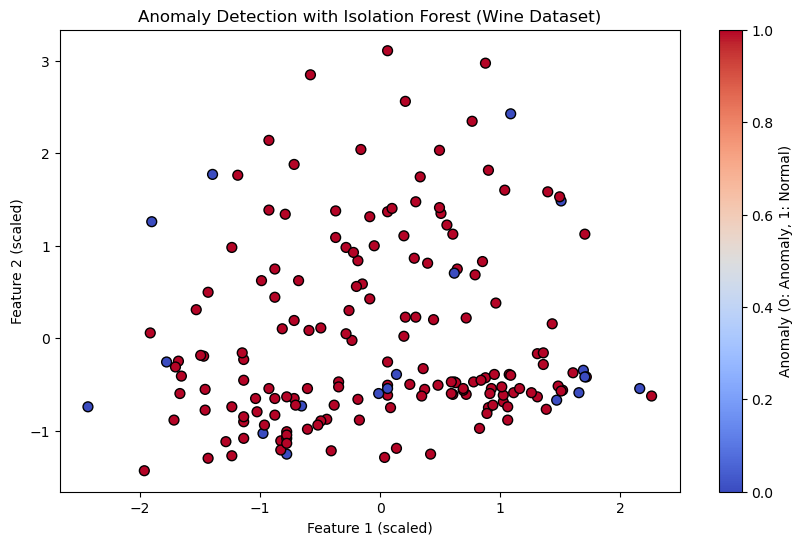

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Standardize the data (important for distance-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # contamination is the expected anomaly fraction

# Fit the model and predict anomalies
anomalies = iso_forest.fit_predict(X_scaled)

# The output of fit_predict is 1 for normal points and -1 for anomalies
# Convert them into a binary format where 1 means normal, and 0 means anomaly
anomalies = [1 if anomaly == 1 else 0 for anomaly in anomalies]

# Print the number of anomalies detected
num_anomalies = sum([1 for anomaly in anomalies if anomaly == 0])
print(f"Number of anomalies detected: {num_anomalies}")

# Visualizing the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=anomalies, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Anomaly Detection with Isolation Forest (Wine Dataset)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.colorbar(label="Anomaly (0: Anomaly, 1: Normal)")
plt.show()
